# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2021 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 1 - Regression
### @author: Cheng Jie Huang - cha110@sfu.ca

In [1]:
# Load General Libraries
from scipy import stats
import os
import glob
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scipy
import pickle
import os

# 1. Getting Started

In [2]:
# rPath = r"Z:\sibroot\repo\personal\MSE491\SFU_ML\lab1\Gas Turbine Dataset"
# os.chdir(rPath)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# print(all_filenames)
#combine and import all files in the list to pandas dataframe
dataset = pd.concat([pd.read_csv(f) for f in all_filenames ])
# os.chdir(r"Z:\sibroot\repo\personal\MSE491\SFU_ML\lab1")

Text(0, 0.5, 'NOX Amplitude')

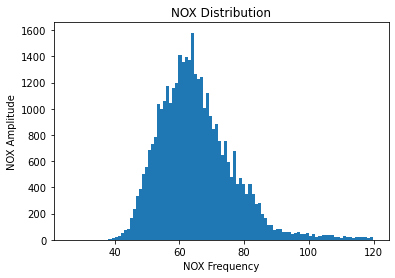

In [3]:
# 1.3
NOX = dataset['NOX']
# np.histogram(NOX, bins=100)
plt.hist(NOX, bins=100)
plt.title('NOX Distribution')
plt.xlabel('NOX Frequency')
plt.ylabel('NOX Amplitude')

looks like a normal distribution to me!

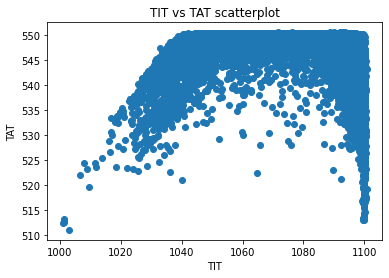

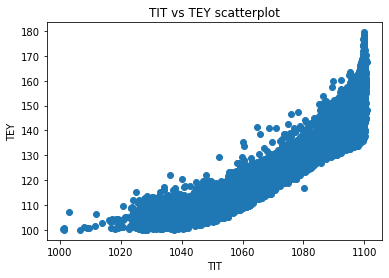

-0.380862393620118
0.9102972462822895


In [4]:
# 1.4a
TIT = dataset["TIT"]
TAT = dataset["TAT"]
plt.scatter(TIT,TAT)
plt.title('TIT vs TAT scatterplot')
plt.xlabel('TIT')
plt.ylabel('TAT')
plt.show()

# 1.4b
TEY = dataset["TEY"]
plt.scatter(TIT,TEY)
plt.title('TIT vs TEY scatterplot')
plt.xlabel('TIT')
plt.ylabel('TEY')
plt.show()

# 1.4c
print(scipy.stats.pearsonr(TIT, TAT)[0])
print(scipy.stats.pearsonr(TIT, TEY)[0])

# 1.5
xvar = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP']
X = dataset[xvar]
yvar = ['TEY','CO','NOX']
Y = dataset[yvar]

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

1.4a: there does not appear to be a linear association  
1.4b: there appears to be a linear association  
1.4c: a Pearson's correlation coefficient of -0.38 implies little linear correlation, while a 0.91 imples a strong linear correlation

# 2. Simple Linear Regression



[0.988673506635661, 'CDP']
[0.963874793645903, 'GTEP']
[0.910189172658981, 'TIT']
[0.681117335222972, 'TAT']
[0.6639318446092546, 'AFDP']
[0.14030686482512714, 'AH']
[0.11568544126950042, 'AP']
[0.09049159403509838, 'AT']
CDP , TEY  rmse & r2 Test:  2.3811635588161972 0.9772555954210641
CDP , TEY  rmse & r2 Train:  2.4095982438984658 0.9760653675501568
[0.7055513217368142, 'TIT']
[0.550459638440407, 'CDP']
[0.5179012652708573, 'GTEP']
[0.4490358371963753, 'AFDP']
[0.17387664748267243, 'AT']
[0.10744358796354292, 'AH']
[0.06850829991352461, 'AP']
[0.05759003624362555, 'TAT']
TIT , CO  rmse & r2 Test:  1.7179512152301406 0.42128932248941375
TIT , CO  rmse & r2 Train:  1.7263011690979155 0.41845147092702306
[0.5574952151678381, 'AT']
[0.21513699094240973, 'TIT']
[0.20305986488584993, 'GTEP']
[0.19152737591493202, 'AP']
[0.187741318591398, 'AFDP']
[0.1726952531094667, 'CDP']
[0.16302087760126543, 'AH']
[0.09283992193811977, 'TAT']
AT , NOX  rmse & r2 Test:  9.665488809679491 0.313440287822

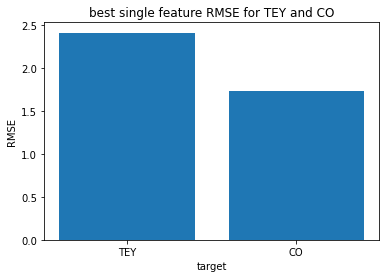

In [19]:
# 2.1/2.2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

# Ranks input by correlation
def sortByCoeff(x, y):
    # iterate through x and store correlation
    correlations = []
    for i in x:
        currentP = scipy.stats.pearsonr(x[i], y)
        pearson = abs(currentP[0])
        correlations.append([pearson,i])    
    #sort correlations
    correlations.sort(reverse = True)
    for pairs in correlations:
        print(pairs)
    return correlations

# builds simple linear regression 
def lineReg(xTrain,yTrain,xTest,yTest,name):
    simp_lin_reg = LinearRegression()
    simp_lin_reg.fit(xTrain, yTrain)
    y_pred = simp_lin_reg.predict(xTest).astype('int64')
    lin_reg_r2 = r2_score(yTest, y_pred)
    mse = mean_squared_error(yTest, y_pred)
    rmse = math.sqrt(mse)
    # Save Model
    pickle.dump(simp_lin_reg, open(name+'.pkl', 'wb'))

    # Save Test Set
    np.savetxt(name+".csv", X_test, delimiter=",")

    # print('rmse: ',rmse, 'r2: ', lin_reg_r2)
    return rmse, lin_reg_r2

def SLR22(target, name):
    a = sortByCoeff(x_train, y_train[target])
    NOXBest = a[0][1]
    X1_train = np.array(x_train[NOXBest]).reshape(-1,1)
    Y1_train = np.array(y_train[target]).reshape(-1,1)
    X1_test = np.array(x_test[NOXBest]).reshape(-1,1)
    Y1_test = y_test[target]

    rmse1, r21 = lineReg(X1_train, Y1_train, X1_test, Y1_test, name+'test')
    rmse2, r22 = lineReg(X1_train, Y1_train, X1_train, Y1_train, name+'train')
    print(NOXBest,',', target, ' rmse & r2 Test: ', rmse1, r21)
    print(NOXBest,',', target, ' rmse & r2 Train: ',rmse2, r22)
    return rmse2, r22

rmse1, r21 = SLR22('TEY', 'Model_2.1TEY')
rmse2, r22 = SLR22('CO', 'Model_2.1CO')
rmse3, r23 = SLR22('NOX', 'Model_2.1NOX')

plt.bar(["TEY", "CO"],[rmse1, rmse2])
plt.title('best single feature RMSE for TEY and CO')
plt.xlabel('target')
plt.ylabel('RMSE')
plt.show()

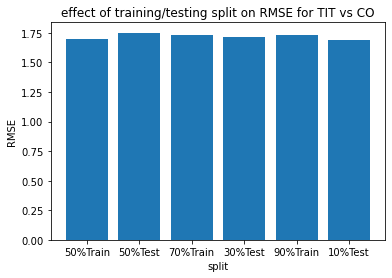

In [6]:
# 2.3
RMSEs = []
for i in [0.5, 0.3, 0.1]:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= i, random_state=0)

    X_test = np.array(x_test['TIT']).reshape(-1,1)
    Y_test = np.array(y_test['CO']).reshape(-1,1)
    X_train = np.array(x_train['TIT']).reshape(-1,1)
    Y_train = np.array(y_train['CO']).reshape(-1,1)

    rmse0, r21 = lineReg(X_train, Y_train, X_train, Y_train,'model2.3_TrainSize'+str(1-i))
    rmse1, r22 = lineReg(X_train, Y_train, X_test, Y_test,'model2.3_TestSize'+str(i))
    RMSEs.append(rmse0)
    RMSEs.append(rmse1)
# print(RMSEs)
plt.bar(["50%Train", "50%Test", "70%Train", "30%Test","90%Train", "10%Test",],RMSEs)
plt.title('effect of training/testing split on RMSE for TIT vs CO')
plt.xlabel('split')
plt.ylabel('RMSE')
plt.show()

I didn't expect the performance of the RMSE values to be so similar... maybe I messed up something in the algorithms?

# 3. Multiple Linear Regression

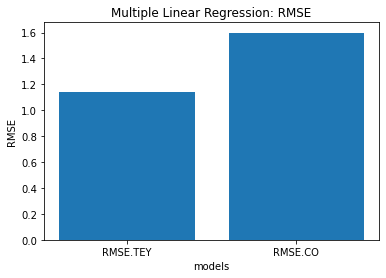

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train = np.array(x_train).reshape(-1,8)
# print(X_train)
X_test = np.array(x_test).reshape(-1,8)
Y_train = np.array(y_train['TEY']).reshape(-1,1)
Y_test = np.array(y_test['TEY']).reshape(-1,1)
rmse1, r21 = lineReg(X_train, Y_train, X_test, Y_test, "Model3.1_TEY")
Y_train = np.array(y_train['CO']).reshape(-1,1)
Y_test = np.array(y_test['CO']).reshape(-1,1)
rmse2, r22 = lineReg(X_train, Y_train, X_test, Y_test, "Model3.1_CO")

plt.bar(['RMSE.TEY', 'RMSE.CO'],[rmse1, rmse2])
plt.title('Multiple Linear Regression: RMSE')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.show()

In conclusion, employing more features does not always improve performance

# 4. Feature Selection

[0.988673506635661, 'CDP']
[0.963874793645903, 'GTEP']
[0.910189172658981, 'TIT']
[0.681117335222972, 'TAT']
[0.6639318446092546, 'AFDP']
[0.14030686482512714, 'AH']
[0.11568544126950042, 'AP']
[0.09049159403509838, 'AT']
[0.7055513217368142, 'TIT']
[0.550459638440407, 'CDP']
[0.5179012652708573, 'GTEP']
[0.4490358371963753, 'AFDP']
[0.17387664748267243, 'AT']
[0.10744358796354292, 'AH']
[0.06850829991352461, 'AP']
[0.05759003624362555, 'TAT']


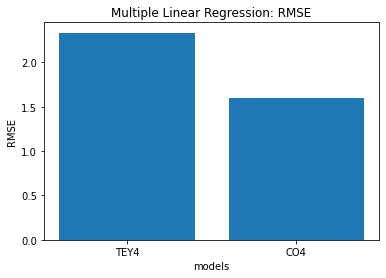

In [8]:
corr1 = sortByCoeff(x_train,y_train['TEY'])
corr2 = sortByCoeff(x_train,y_train['CO'])
TEY4 = []
CO4 = []

for i in range(0,4):
    TEY4.append(corr1[i][1])
    CO4.append(corr2[i][1])
    # print(corr1[i][1])
    # print(corr2[i][1])

X_train = np.array(x_train[TEY4]).reshape(-1,4)
X_test = np.array(x_test[TEY4]).reshape(-1,4)
Y_train = np.array(y_train['TEY']).reshape(-1,1)
Y_test = np.array(y_test['TEY']).reshape(-1,1)
rmse1, r21 = lineReg(X_train, Y_train, X_test, Y_test, "Model4_TEY")

X_train = np.array(x_train[CO4]).reshape(-1,4)
X_test = np.array(x_test[CO4]).reshape(-1,4)
Y_train = np.array(y_train['CO']).reshape(-1,1)
Y_test = np.array(y_test['CO']).reshape(-1,1)
rmse2, r22 = lineReg(x_train, Y_train, x_test, Y_test, "Model4_CO")

plt.bar(['TEY4', 'CO4'],[rmse1, rmse2])
plt.title('Multiple Linear Regression: RMSE')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.show()

Why is RMSE higher than using all dataset features?

# 5. Polynomial Regression

In [9]:
def viz_polymonial(Xpv_train, ypv_train, poly_pred, xlabel, ylabel):
    plt.scatter(Xpv_train, ypv_train, color='red')
    plt.plot(Xpv_train, poly_pred, color='blue')
    plt.title('Polymonial Regression with 1 Feature for visualization')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return

In [14]:
import random
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def polyReg (deg, y):
    # Try with polynomial of degree 3
    degree = deg
    randFeats = ['AT','AP','AH','AFDP']
    ypv_train = y_train[y]
    Xpv_train = x_train[randFeats]
    Xpv_train = np.array(Xpv_train).reshape(-1, 4)
    ypv_train = np.array(ypv_train).reshape(-1, 1)

    # Standardizing features by removing the mean and scaling to unit variance
    scaler = preprocessing.StandardScaler()
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
    polyreg_scaled.fit(Xpv_train,ypv_train)

    # Save Model
    pickle.dump(polyreg_scaled, open('Model5'+y+str(deg)+'.pkl', 'wb'))

    # Visualizing the Polymonial Regression results
    xTest = np.array(x_test[randFeats]).reshape(-1,4)
    poly_pred = polyreg_scaled.predict(xTest)
    # yTest = np.array(y_test[y]).reshape(-1,1)
    # print('yTest len: ', len(yTest))
    # print('poly_pred len: ', len(poly_pred))
    # zipped_pred = zip(xTest, poly_pred)
    # # print(type(zipped_pred))
    # sorted_pred = sorted(zipped_pred)
    # tuples = zip(*sorted_pred)
    # xTest, poly_pred = [list(tuple) for tuple in tuples]
    # # plt.figure()
    # # viz_polymonial(Xpv_train, ypv_train, poly_pred, x, y)

    yTest = np.array(y_test[y]).reshape(-1,1)
    poly_reg_r2 = r2_score(yTest, poly_pred)
    mse = mean_squared_error(yTest, poly_pred)
    rmse = math.sqrt(mse)
    
    # print('rmse: ',rmse, 'r2: ', lin_reg_r2)
    return rmse, poly_reg_r2

In [15]:
results = []
for j in [2,5,11]:
    for y in yvar:
        print(j,y)
        rmse, r2 = polyReg(j, y)
        result = [j, y, rmse, r2]
        print(result)
        results.append(result)

# MemoryError: Unable to allocate 16.5 GiB for an array with shape (29386, 75582) and data type float64

2 TEY
[2, 'TEY', 10.097880135559533, 0.5909687029084739]
2 CO
[2, 'CO', 1.938386546014797, 0.26324920187797474]
2 NOX
[2, 'NOX', 8.770350366775538, 0.4347187803826321]
5 TEY
[5, 'TEY', 9.676598574934703, 0.6243861763172114]
5 CO
[5, 'CO', 1.8841930740483526, 0.3038695234278681]
5 NOX
[5, 'NOX', 8.314374664609966, 0.49196942284668477]
11 TEY


MemoryError: Unable to allocate 306. MiB for an array with shape (29386, 1365) and data type float64

In [12]:
# results = []
# for i in range(2,15):
#     rmse, r2 = polyReg(i, 'AT', 'NOX')
#     result = [j, i, y, rmse, r2]
#     # print(result)
#     results.append(result)

# from operator import itemgetter

# results = []
# for i in xvar:
#     for y in yvar:
#         sortL = []
#         for j in (2,15):
#             rmse, r2 = polyReg(j, i, y)
#             result = [rmse, j, i, y, r2]
#             sortL.append(result)
#         sortL.sort(reverse = True)
#         print(sortL[0])
#         results.append(sortL[0])

[15.995382398691149, 15, 'AT', 'TEY', -0.0388685831030664]
[2.2693904003919387, 15, 'AT', 'CO', -0.03572516006093829]
[13.462856308999562, 15, 'AT', 'NOX', -0.3504347568159205]
[16.017555068648374, 15, 'AP', 'TEY', -0.041750721805315916]
[2.2398204047552013, 15, 'AP', 'CO', -0.008910154034617035]
[12.010144663199938, 15, 'AP', 'NOX', -0.07472082197987273]
[15.774138386123338, 15, 'AH', 'TEY', -0.010328610701299867]
[2.242577426710419, 15, 'AH', 'CO', -0.011395442037509307]
[11.797925224643869, 15, 'AH', 'NOX', -0.03707571497156237]
[19.44442494485347, 15, 'AFDP', 'TEY', -0.5351879961296997]
[2.5295752625456975, 15, 'AFDP', 'CO', -0.286830395231255]
[12.11398033150495, 15, 'AFDP', 'NOX', -0.09338450365061712]
[22.61074466336874, 15, 'GTEP', 'TEY', -1.0758744795876458]
[2.6703771258117004, 15, 'GTEP', 'CO', -0.4340731278018384]
[12.379167750236304, 15, 'GTEP', 'NOX', -0.14177908199059264]
[22.491604745161826, 15, 'TIT', 'TEY', -1.054055832324162]
[2.8667510232629407, 15, 'TIT', 'CO', -0.